In [1]:
import os
import numpy as np
import pandas as pd

# main plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load the data
csv_path = os.path.join('example_datasets', "cars_dataset.csv",)
cars = pd.read_csv(csv_path)

# view the data
cars

,Make,Model,Origin,Year,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
0,Chevrolet,Chevelle Malibu,US,70,18.0,8,307.0,130,3504,12.0
1,Buick,Skylark 320,US,70,15.0,8,350.0,165,3693,11.5
2,Plymouth,Satellite,US,70,18.0,8,318.0,150,3436,11.0
3,AMC,Rebel SST,US,70,16.0,8,304.0,150,3433,12.0
4,Ford,Torino,US,70,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...,...,...,...,...
401,Ford,Mustang GL,US,82,27.0,4,140.0,86,2790,15.6
402,Volkswagen,Pickup,Europe,82,44.0,4,97.0,52,2130,24.6
403,Dodge,Rampage,US,82,32.0,4,135.0,84,2295,11.6
404,Ford,Ranger,US,82,28.0,4,120.0,79,2625,18.6


In [12]:
japan_cars = cars.loc[cars["Origin"]=="Japan"]

Text(0, 0.5, 'values')

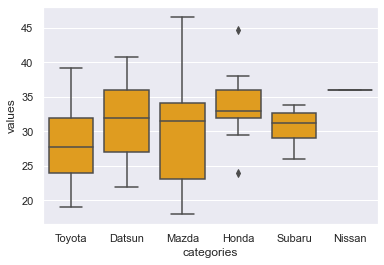

In [43]:
fig, ax = plt.subplots()
ax = sns.boxplot(y = "MPG",
            x = "Make",
            color = "orange",
            data = japan_cars)
ax.set_xlabel('categories')
ax.set_ylabel('values')

In [ ]:
df_agg = japan_cars[['Make','MPG']].groupby('Make').agg(['median'])
df_agg.sort_values(by=[('MPG', 'median')], ascending = False, inplace=True)


Text(0, 0.5, 'values')

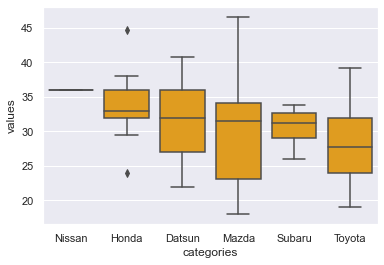

In [44]:
fig, ax = plt.subplots()
ax = sns.boxplot(y = "MPG",
                 x = "Make",
                 order = df_agg.index,
                 color = "orange",
                 data = japan_cars)
ax.set_xlabel('categories')
ax.set_ylabel('values')

Text(0, 0.5, 'categories')

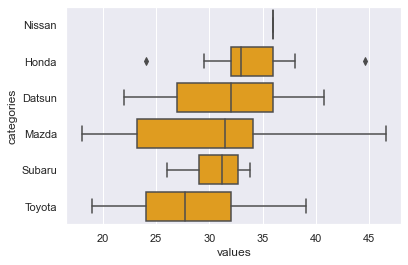

In [45]:
fig, ax = plt.subplots()
ax = sns.boxplot(x = "MPG",
                 y = "Make",
                 order = df_agg.index,
                 color = "orange",
                 data = japan_cars)
ax.set_xlabel('values')
ax.set_ylabel('categories')

In [ ]:
fig, ax = plt.subplots()
ax = sns.boxplot(y = "MPG",
                 x = "Make",
                 data = japan_cars)
                
ax.set_xlabel('categories')
ax.set_ylabel('values')


df.mean().sort_values().index


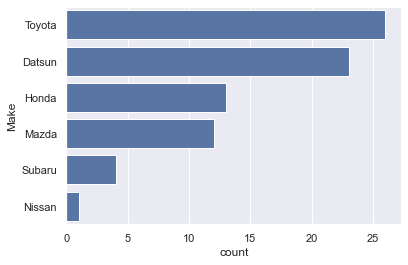

In [28]:
sns.boxplot(y='Make', 
            order = japan_cars['Make'].value_counts().index,
            data = japan_cars)

In [38]:
df_agg

,MPG
,median
Make,
Nissan,36.00
Honda,33.00
Datsun,32.00
Mazda,31.45
Subaru,31.15
Toyota,27.75


In [ ]:
df_agg = df_pivot[['state','sales']].groupby('state').agg(['sum'])
df_agg.sort_values(by=[('sales', 'sum')], ascending = False, inplace=True)

In [36]:
df_agg

,MPG
,median
Make,
Datsun,32.00
Honda,33.00
Mazda,31.45
Nissan,36.00
Subaru,31.15
Toyota,27.75


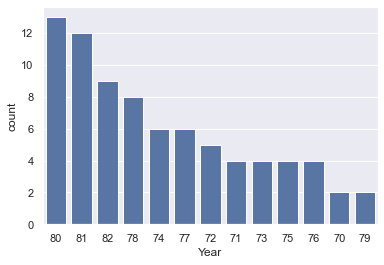

In [20]:


sns.countplot(x='Year',
              color='b',
              order = japan_cars['Year'].value_counts().index,
              data = japan_cars)

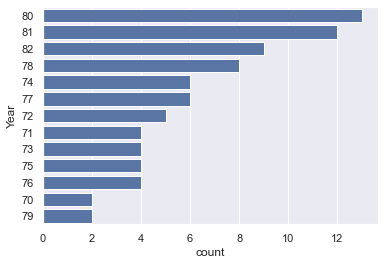

In [21]:
sns.countplot(y='Year',
              color='b',
              order = japan_cars['Year'].value_counts().index,
              data = japan_cars)

In [ ]:
sns.countplot(x='Year', data = cars.loc[cars["Origin"]=="Japan"])

In [2]:
# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

In [3]:
corr_mat

,level_0,level_1,correlation
0,1-1-lh,1-1-lh,1.000000
1,1-1-lh,1-1-rh,0.881516
2,1-1-lh,5-1-lh,0.431619
3,1-1-lh,5-1-rh,0.418708
4,1-1-lh,6-1-lh,-0.084634
...,...,...,...
1439,17-4-lh,17-2-lh,0.517481
1440,17-4-lh,17-2-rh,0.256544
1441,17-4-lh,17-3-lh,0.264381
1442,17-4-lh,17-3-rh,0.090302


In [4]:
df

,1-1-lh,1-1-rh,5-1-lh,5-1-rh,6-1-lh,6-1-rh,6-2-lh,6-2-rh,7-1-lh,7-1-rh,...,13-2-rh,13-3-rh,13-4-rh,17-1-lh,17-1-rh,17-2-lh,17-2-rh,17-3-lh,17-3-rh,17-4-lh
0,56.055744,92.031036,-35.898861,-1.889181,5.898688,-43.692322,-47.664265,12.284122,1.566538,-13.042585,...,14.738475,-16.853010,-34.217819,-21.734550,1.028253,7.791784,68.903725,-10.520872,120.490463,-39.686432
1,55.547253,43.690075,19.568010,15.902983,-23.231823,-10.745867,10.269546,31.275831,-26.309488,-18.077026,...,23.792282,8.927007,-19.732401,-13.035799,46.381824,-15.752450,31.000332,-39.607521,24.764011,-36.771008
2,60.997768,63.438793,19.247454,37.209419,2.392153,16.509109,-5.314236,2.372976,-7.342168,-24.550989,...,8.968520,1.413584,-4.955075,26.033442,34.212200,1.326110,-22.580757,12.985169,-75.027451,6.434262
3,18.514868,12.657158,32.896915,11.199619,-14.665752,2.073715,32.634335,45.825409,-47.632999,-6.580215,...,19.627728,49.208748,1.661293,55.297466,4.255006,-2.420144,12.098393,-15.819172,-37.361431,-4.650954
4,-2.527392,-63.104668,18.396759,3.219077,-41.856911,-24.690414,-33.975418,-24.149668,-6.315651,-29.344135,...,55.853088,46.737320,4.586625,43.067562,52.219875,28.232882,-11.719750,5.453649,5.169828,87.809135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,-7.429513,-4.813219,0.017912,-25.305094,-75.461159,-70.289261,-13.119029,-5.194376,-56.022263,-24.290606,...,-19.436220,15.894722,22.195951,76.179489,51.934669,-6.614513,-6.690762,22.893030,48.274380,76.228455
916,-33.554138,-38.605621,-32.935612,-21.783203,-16.198238,-34.893780,16.504656,13.005379,26.230785,4.764211,...,16.711153,17.339653,13.682954,50.962399,13.696922,63.503616,57.401176,24.974548,51.972153,64.538788
917,-78.539566,-74.197189,-32.800556,-37.021500,2.098941,-18.581594,11.386637,3.676295,52.871113,-3.970096,...,45.261150,37.007389,29.753304,43.800747,8.144480,47.281460,70.499649,66.994400,81.539246,64.969772
918,-103.235825,-98.744286,-14.330512,-17.224781,-3.007454,-42.672840,1.581095,-38.023777,37.736561,4.872248,...,33.483253,37.434860,-14.403917,46.674419,40.954796,0.877180,37.577152,20.517746,3.124434,56.718388
